In [1]:
#As usual, we start by importing the modules we require. These are:

%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from numpy.random import normal

In [2]:
aig_data = pd.read_csv('~/Data/AIG_20171201_15y.csv')

In [3]:
aig_data.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
0,AIG,2003-01-02,58.10,60.30,57.74,60.30,6276000.0,0.0,1.0,855.602805,888.000846,850.301308,888.000846,313800.0
1,AIG,2003-01-03,60.05,60.42,59.54,60.12,3894000.0,0.0,1.0,884.319250,889.768012,876.808795,885.350097,194700.0
2,AIG,2003-01-06,60.12,62.51,60.10,62.14,5216000.0,0.0,1.0,885.350097,920.546151,885.055570,915.097389,260800.0
3,AIG,2003-01-07,62.14,62.19,60.60,60.93,5384000.0,0.0,1.0,915.097389,915.833708,892.418761,897.278467,269200.0
4,AIG,2003-01-08,60.93,61.49,59.99,60.17,3454000.0,0.0,1.0,897.278467,905.525241,883.435667,886.086416,172700.0


In [4]:
aig_data.tail()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
3751,AIG,2017-11-27,59.10,59.190,58.6900,58.76,4138130.0,0.0,1.0,59.10,59.190,58.6900,58.76,4138130.0
3752,AIG,2017-11-28,58.76,60.030,58.5216,59.82,6646298.0,0.0,1.0,58.76,60.030,58.5216,59.82,6646298.0
3753,AIG,2017-11-29,60.14,61.095,60.0300,60.30,7692124.0,0.0,1.0,60.14,61.095,60.0300,60.30,7692124.0
3754,AIG,2017-11-30,60.63,60.630,59.6850,59.96,6505682.0,0.0,1.0,60.63,60.630,59.6850,59.96,6505682.0
3755,AIG,2017-12-01,60.07,60.200,58.9800,59.88,4520292.0,0.0,1.0,60.07,60.200,58.9800,59.88,4520292.0


In [5]:
aig_data.set_index('date', inplace=True)

<AxesSubplot: xlabel='date'>

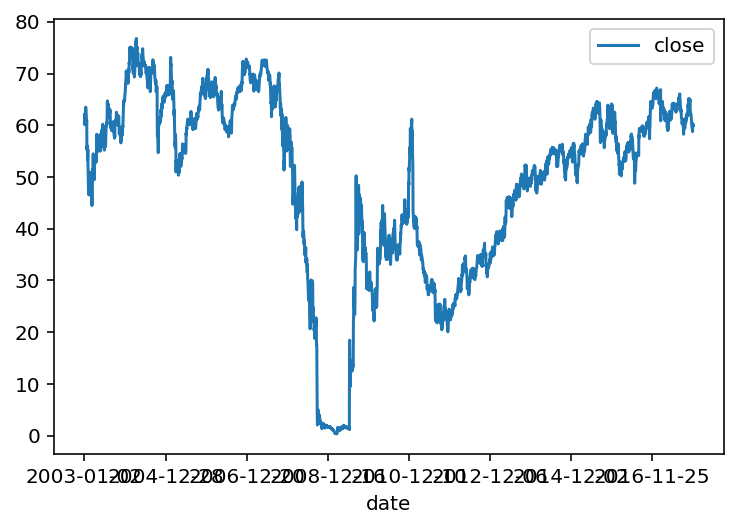

In [6]:
aig_data.plot(y='close')

<AxesSubplot: xlabel='date'>

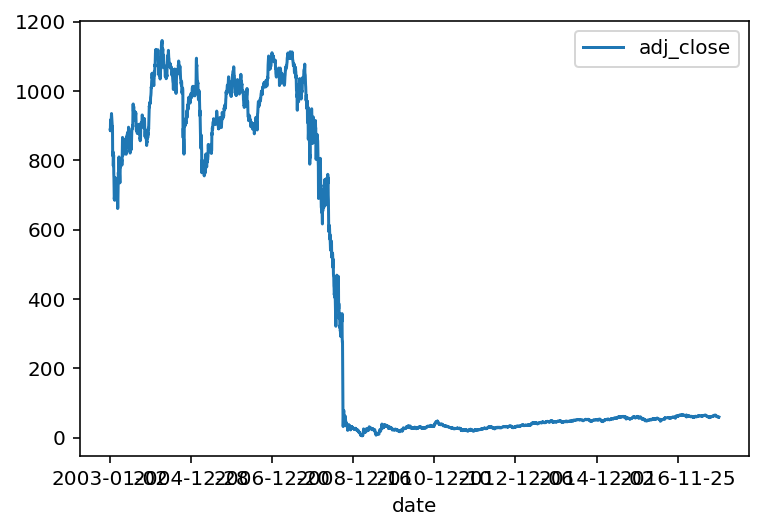

In [7]:
aig_data.plot(y='adj_close')

In [8]:
log_returns = np.log(aig_data['adj_close']).diff().dropna()

In [9]:
log_returns

date
2003-01-03   -0.002990
2003-01-06    0.033047
2003-01-07   -0.019664
2003-01-08   -0.012552
2003-01-09    0.036391
                ...   
2017-11-27   -0.004584
2017-11-28    0.017879
2017-11-29    0.007992
2017-11-30   -0.005654
2017-12-01   -0.001335
Name: adj_close, Length: 3755, dtype: float64

<AxesSubplot: xlabel='date'>

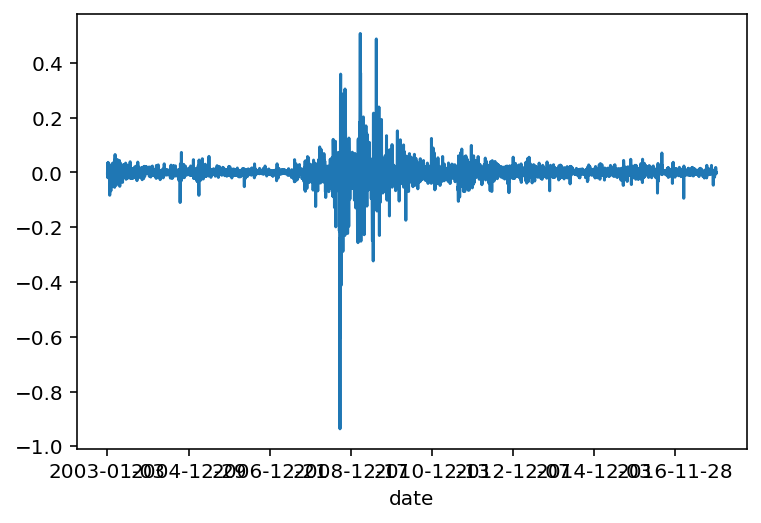

In [10]:
log_returns.plot()

<AxesSubplot: >

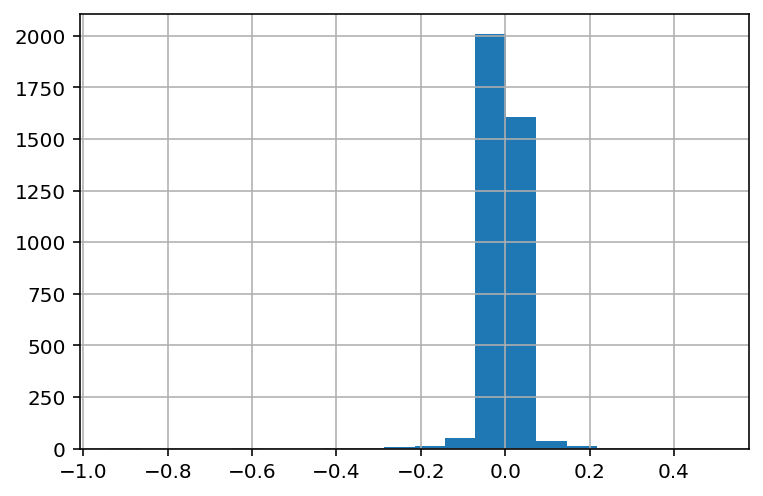

In [11]:
log_returns.hist(bins=20)

In [12]:
mlogR = np.sort(- log_returns.values)


In [13]:
alpha = 0.99
mlogR[int(alpha* len(mlogR))]

0.12260232209235644

In [14]:
var_99_R = 1-np.exp(-mlogR[int(alpha* len(mlogR))])
var_99_R

0.11538461538463674

In [15]:
mlogR[int(alpha* len(mlogR)):]

array([0.12260232, 0.12332322, 0.1246634 , 0.12830071, 0.13005313,
       0.13121246, 0.13675894, 0.14122643, 0.14172816, 0.14595391,
       0.15692076, 0.15916825, 0.16126815, 0.16335494, 0.16606104,
       0.17484564, 0.19735943, 0.19902963, 0.20585205, 0.21130909,
       0.212922  , 0.2135741 , 0.21428571, 0.22314355, 0.22778393,
       0.23045013, 0.23052366, 0.23111172, 0.23849183, 0.24934592,
       0.25131443, 0.25671985, 0.28872755, 0.32342791, 0.36854816,
       0.41248972, 0.60391605, 0.93625812])

In [16]:
es_samples = 1-np.exp(-mlogR[int(alpha* len(mlogR)):])
es_samples.mean()

0.19994270341566708

**Backtesting**


In [39]:
def backtest_ready_rm (logR, mdate, alpha_var, alpha_es=None, on_PL = True):
    
    '''
    Implementing a 'backtest ready' version of value at risk and expected shortfall
    '''
    
    transform = lambda x: 1-np.exp(-x)
    
    if not alpha_es:
        alpha_es = alpha_var
    
    aux = logR.iloc[logR.index<=mdate]
    maux = np.sort(- aux.values)
    var = maux[int(alpha_var* len(maux))]
    es = maux[int(alpha_es* len(maux)):] 
    if on_PL:
        return transform(var), transform(es).mean()
    else:
        return var, es.mean()


In [32]:
log_returns.index[-1]

'2017-12-01'

In [37]:
backtest_ready_rm(log_returns, '2015-01-01', 0.99)

(0.1317073170731765, 0.2179374034639868)

In [25]:
np.prod(log_returns.index<=log_returns.index[-1])

1

In [52]:
def excess(logR, alpha_var, min_period = 250):
    
    var_series = np.array([backtest_ready_rm (logR, mdate, alpha_var, alpha_es=None, on_PL = False)[0] for mdate in logR.index[250:-1]])
    excess = -logR[251:] > var_series 
    return excess
    

In [53]:
excess_array = excess (log_returns,0.99)

<AxesSubplot: xlabel='date'>

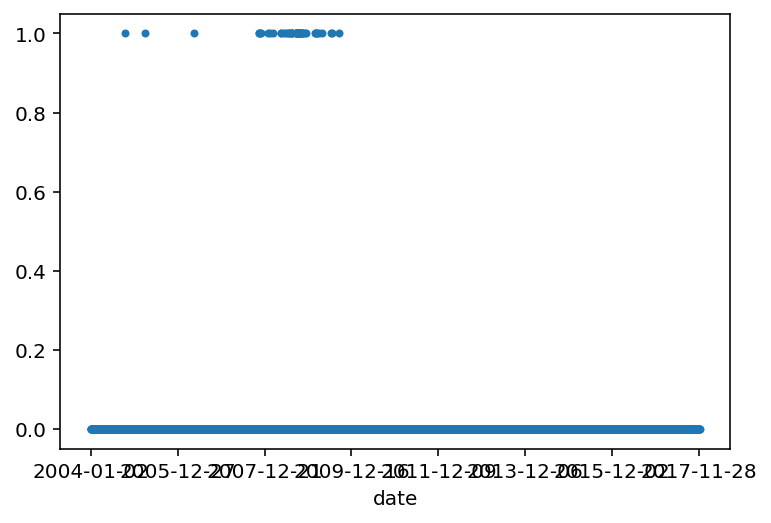

In [60]:
(1*excess_array).plot(style='.')

<AxesSubplot: xlabel='date'>

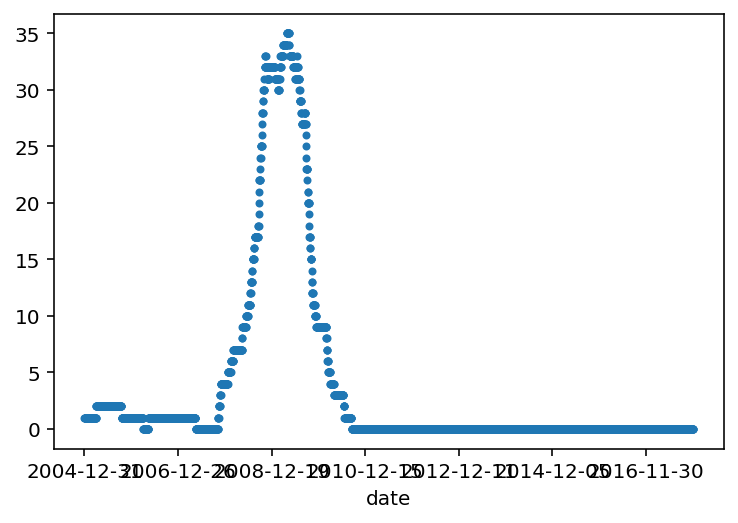

In [68]:
excess_array.rolling(252).sum().dropna().plot(style='.')

In [71]:
(10/252-(0.01))*(252/((0.99)*(0.01)))**0.5

4.73569506621162